In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.6.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 65s 22ms/step - loss: 1.3423 - accuracy: 0.5394 - val_loss: 1.1043 - val_accuracy: 0.6215
Epoch 2/100
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8628 - accuracy: 0.7003 - val_loss: 0.8027 - val_accuracy: 0.7243
Epoch 3/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6990 - accuracy: 0.7576 - val_loss: 0.7018 - val_accuracy: 0.7570
Epoch 4/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5969 - accuracy: 0.7944 - val_loss: 0.6758 - val_accuracy: 0.7708
Epoch 5/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5013 - accuracy: 0.8278 - val_loss: 0.7426 - val_accuracy: 0.7503
Epoch 6/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4218 - accuracy: 0.8538 - val_loss: 0.5935 - val_accuracy: 0.8086
Epoch 7/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.3612 - accuracy: 0.8759 - val_loss: 0

In [ ]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=100)

Epoch 1/100
1562/1562 [==============================] - 58s 37ms/step - loss: 0.5784 - accuracy: 0.8191 - val_loss: 0.5189 - val_accuracy: 0.8365
Epoch 2/100
1562/1562 [==============================] - 56s 36ms/step - loss: 0.4604 - accuracy: 0.8509 - val_loss: 0.5066 - val_accuracy: 0.8343
Epoch 3/100
1562/1562 [==============================] - 57s 36ms/step - loss: 0.4241 - accuracy: 0.8605 - val_loss: 0.4816 - val_accuracy: 0.8485
Epoch 4/100
1562/1562 [==============================] - 57s 37ms/step - loss: 0.4030 - accuracy: 0.8678 - val_loss: 0.4500 - val_accuracy: 0.8513
Epoch 5/100
1562/1562 [==============================] - 57s 36ms/step - loss: 0.3878 - accuracy: 0.8727 - val_loss: 0.4833 - val_accuracy: 0.8434
Epoch 6/100
1562/1562 [==============================] - 57s 37ms/step - loss: 0.3660 - accuracy: 0.8785 - val_loss: 0.4403 - val_accuracy: 0.8574
Epoch 7/100
1562/1562 [==============================] - 57s 37ms/step - loss: 0.3582 - accuracy: 0.8808 - val_loss: 0

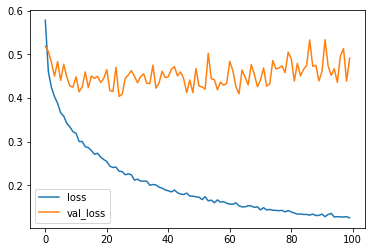

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

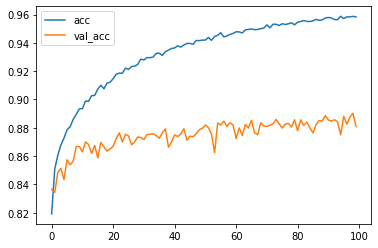

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[897   6  20   3   4   1  10   2  32  25]
 [  6 950   0   0   0   1   2   1   7  33]
 [ 17   0 890  11  19  17  26  10   3   7]
 [ 14   6  69 692  33  79  61  20  13  13]
 [  5   1  55  19 859   9  30  17   2   3]
 [  4   3  37  79  30 789  29  21   2   6]
 [  5   0  30   9   7   5 940   1   2   1]
 [  7   0  22   8  27  17   5 906   1   7]
 [ 24   7   4   2   2   0   3   0 943  15]
 [  4  41   2   3   0   0   0   1   6 943]]


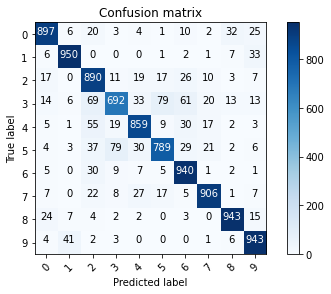

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

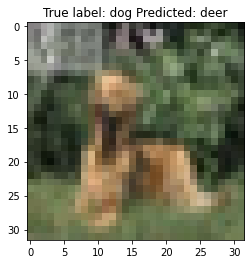

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
#it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 